In [28]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

In [29]:
train = pd.read_csv('/content/train.csv')
train

,Id,target,1,2,3,4,5,6,7
0,0,1.10,0.69,1.04,NaN,NaN,NaN,NaN,NaN
1,3,0.41,0.71,0.72,NaN,NaN,NaN,NaN,NaN
2,4,1.70,2.21,2.21,NaN,NaN,NaN,NaN,NaN
3,5,0.62,0.60,0.68,NaN,NaN,NaN,NaN,NaN
4,6,0.60,0.60,0.90,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
142,208,0.44,0.38,1.90,NaN,NaN,NaN,NaN,NaN
143,211,0.30,0.37,0.50,NaN,NaN,NaN,NaN,NaN
144,212,1.50,2.40,3.60,NaN,NaN,NaN,NaN,NaN
145,213,0.52,0.31,0.50,NaN,NaN,NaN,NaN,NaN


In [30]:
train.head()

,Id,target,1,2,3,4,5,6,7
0,0,1.10,0.69,1.04,NaN,NaN,NaN,NaN,NaN
1,3,0.41,0.71,0.72,NaN,NaN,NaN,NaN,NaN
2,4,1.70,2.21,2.21,NaN,NaN,NaN,NaN,NaN
3,5,0.62,0.60,0.68,NaN,NaN,NaN,NaN,NaN
4,6,0.60,0.60,0.90,NaN,NaN,NaN,NaN,NaN


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      147 non-null    int64  
 1   target  147 non-null    float64
 2   1       145 non-null    float64
 3   2       145 non-null    float64
 4   3       32 non-null     float64
 5   4       31 non-null     float64
 6   5       33 non-null     float64
 7   6       37 non-null     float64
 8   7       37 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 10.5 KB


In [32]:
test = pd.read_csv('/content/test.csv')
test

,Id,1,2,3,4,5,6,7
0,1,0.63,0.60,NaN,NaN,NaN,NaN,NaN
1,2,1.50,0.87,NaN,NaN,NaN,NaN,NaN
2,32,0.32,0.54,NaN,NaN,NaN,NaN,NaN
3,40,1.38,1.63,NaN,NaN,NaN,NaN,NaN
4,43,1.72,1.68,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
58,206,0.37,0.26,0.71,18.28,24.99,0.57,1.57
59,209,0.39,0.32,NaN,NaN,NaN,NaN,NaN
60,210,0.43,0.21,NaN,NaN,NaN,NaN,NaN
61,215,0.36,0.42,NaN,NaN,NaN,NaN,NaN


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      63 non-null     int64  
 1   1       63 non-null     float64
 2   2       63 non-null     float64
 3   3       15 non-null     float64
 4   4       15 non-null     float64
 5   5       16 non-null     float64
 6   6       14 non-null     float64
 7   7       14 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 4.1 KB


In [34]:
train = train.drop(['Id','3','4','5','6','7'], axis = 1)
train = train.dropna().reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  144 non-null    float64
 1   1       144 non-null    float64
 2   2       144 non-null    float64
dtypes: float64(3)
memory usage: 3.5 KB


In [35]:
train.describe()

,target,1,2
count,144.000000,144.000000,144.000000
mean,0.580486,0.588264,0.664653
std,0.434269,0.463758,0.592069
min,0.040000,0.040000,0.020000
25%,0.250000,0.227500,0.220000
50%,0.425000,0.415000,0.455000
75%,0.827500,0.802500,0.920000
max,1.930000,2.400000,3.600000


In [36]:
target = train.pop('target')
test = test.drop(['Id','3','4','5','6','7'], axis = 1)
test = test.dropna().reset_index(drop=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       63 non-null     float64
 1   2       63 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [37]:
scaler = StandardScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns = train.columns)
train

,1,2
0,0.220139,0.636172
1,0.263415,0.093807
2,3.509148,2.619191
3,0.025395,0.026012
4,0.025395,0.398887
...,...,...
139,-0.450646,2.093776
140,-0.472284,-0.279068
141,3.920274,4.975086
142,-0.602113,-0.279068


In [38]:
train.describe()

,1,2
count,1.440000e+02,1.440000e+02
mean,-7.401487e-17,-1.480297e-16
std,1.003490e+00,1.003490e+00
min,-1.186345e+00,-1.092615e+00
25%,-7.806288e-01,-7.536369e-01
50%,-3.749122e-01,-3.553381e-01
75%,4.635688e-01,4.327851e-01
max,3.920274e+00,4.975086e+00


In [39]:
scaler = StandardScaler()
test = pd.DataFrame(scaler.fit_transform(test), columns = test.columns)
test

,1,2
0,0.608415,0.407438
1,3.051435,1.072556
2,-0.262086,0.259634
3,2.714467,2.944739
4,3.669210,3.067909
...,...,...
58,-0.121683,-0.430117
59,-0.065522,-0.282313
60,0.046801,-0.553287
61,-0.149764,-0.035973


In [40]:
test.describe()

,1,2
count,6.300000e+01,6.300000e+01
mean,-1.409807e-17,-2.846048e-16
std,1.008032e+00,1.008032e+00
min,-1.104507e+00,-1.021333e+00
25%,-5.007723e-01,-6.271891e-01
50%,-2.059251e-01,-3.562152e-01
75%,1.170029e-01,2.596344e-01
max,3.669210e+00,3.659124e+00


In [41]:
train_all = train.copy()
target_all = target.copy()
train, valid, target_train, target_valid = train_test_split(train_all, target_all, test_size=0.2, random_state=0)
cv_train = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
result = pd.DataFrame({'model' : ['Decision Tree Regressor', 'Random Forest Regressor'], 
                       'train_score': 0, 'valid_score': 0})
result

,model,train_score,valid_score
0,Decision Tree Regressor,0,0
1,Random Forest Regressor,0,0


In [42]:
decision_tree = DecisionTreeRegressor()
param_grid = {'min_samples_leaf': [i for i in range(5,10)], 'max_depth': [i for i in range(3,12)]}
decision_tree_CV = GridSearchCV(decision_tree, param_grid=param_grid, cv=cv_train, verbose=False)
decision_tree_CV.fit(train, target_train)
print(decision_tree_CV.best_params_)
y_train_decision_tree = decision_tree_CV.predict(train)
r2_score_acc = round(r2_score(target_train, y_train_decision_tree)*100, 1)
print(f'Accuracy of DecisionTreeRegressor model training is {r2_score_acc}')
result.loc[result['model'] == 'Decision Tree Regressor', 'train_score'] = r2_score_acc

{'max_depth': 3, 'min_samples_leaf': 6}
Accuracy of DecisionTreeRegressor model training is 84.1


In [43]:
%%time

rf = RandomForestRegressor()
param_grid = {'n_estimators': [10, 100, 500], 'min_samples_leaf': [i for i in range(5,10)], 
              'max_features': ['auto'], 'max_depth': [i for i in range(4,6)], 
              'criterion': ['squared_error'], 'bootstrap': [False]}

rf_CV = GridSearchCV(rf, param_grid=param_grid, cv=cv_train, verbose=False)
rf_CV.fit(train, target_train)
print(rf_CV.best_params_)
y_train_rf = rf_CV.predict(train)
r2_score_acc = round(r2_score(target_train, y_train_rf)*100,1)
print(f'Accuracy of RandomForestRegressor model training is {r2_score_acc}')
result.loc[result['model'] == 'Random Forest Regressor', 'train_score'] = r2_score_acc

{'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 7, 'n_estimators': 500}
Accuracy of RandomForestRegressor model training is 85.5


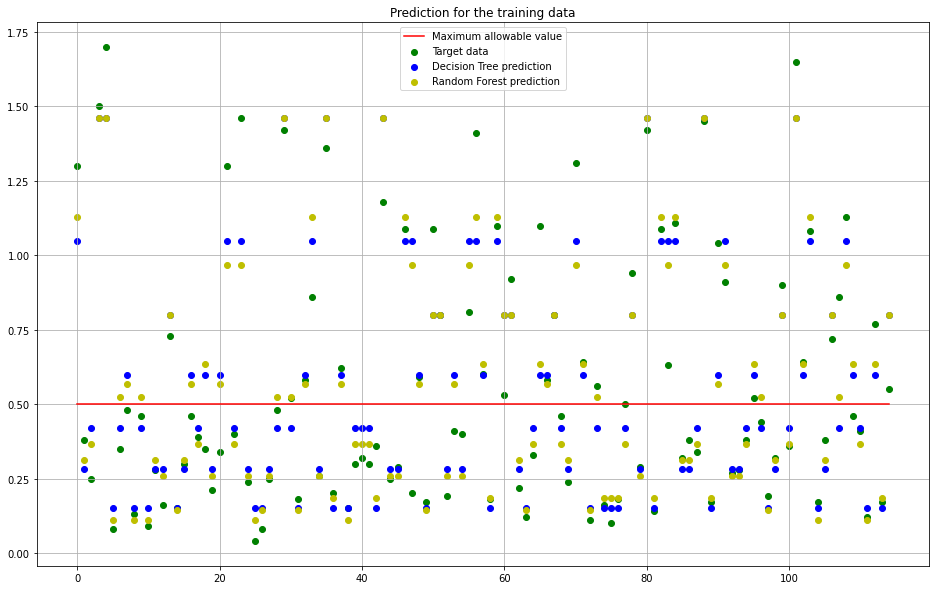

In [44]:
y_test_decision_tree = decision_tree_CV.predict(test)
y_test_rf = rf_CV.predict(test)
x = np.arange(len(train))
plt.figure(figsize=(16,10))
plt.scatter(x, target_train, label = "Target data", color = 'g')
plt.scatter(x, y_train_decision_tree, label = "Decision Tree prediction", color = 'b')
plt.scatter(x, y_train_rf, label = "Random Forest prediction", color = 'y')
plt.plot(x, np.full(len(train), 0.5), label = "Maximum allowable value", color = 'r')
plt.title('Prediction for the training data')
plt.legend(loc='best')
plt.grid(True)